In [20]:
import os
import PIL
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchvision.utils import make_grid, save_image

from utils import visualize_cam, Normalize
from gradcam import GradCAM, GradCAMpp, ScoreCAM, EFCAM, IMCAM, ISGCAM
from gradcam import EFCAM_margin as EFMAR

os.environ['CUDA_VISIBLE_DEVICES'] = '4'

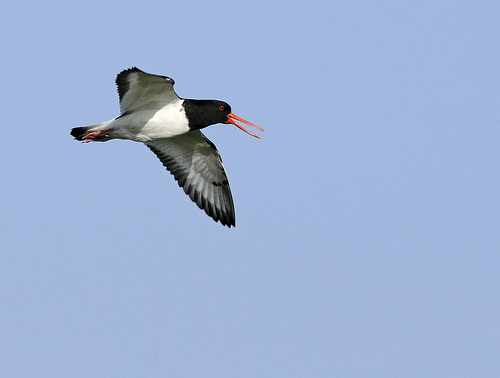

In [21]:
img_dir = 'images'
# img_name = 'collies.JPG'
# img_name = 'multiple_dogs.jpg'
# img_name = 'snake.JPEG'
# img_name = 'water-bird.JPEG'
img_name = 'ILSVRC2012_val_00000548.JPEG' # 40 # 89 654 476 548 726 517 797 799 151 258 61 095 # 548
# img_name = 'Selvaraju et al_2019_Grad-CAM.jpg'
img_path = os.path.join(img_dir, img_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pil_img = PIL.Image.open(img_path)
pil_img

### preprocess image

In [22]:
normalizer = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
torch_img = torch.from_numpy(np.asarray(pil_img)).permute(2, 0, 1).unsqueeze(0).float().div(255).to(device)
torch_img = nn.functional.interpolate(torch_img, size=(224, 224), mode='bilinear', align_corners=False)
normed_torch_img = normalizer(torch_img)

### Load torchvision models and make model dictionaries

In [23]:
alexnet = models.alexnet(pretrained=True)
alexnet.eval(), alexnet.to(device)

vgg = models.vgg16(pretrained=True)
vgg.eval(), vgg.to(device)

resnet = models.resnet101(pretrained=True)
resnet.eval(), resnet.to(device)

densenet = models.densenet161(pretrained=True)
densenet.eval(), densenet.to(device)

squeezenet = models.squeezenet1_1(pretrained=True)
squeezenet.eval(), squeezenet.to(device)


cam_dict = dict()
'''
alexnet_model_dict = dict(type='alexnet', arch=alexnet, layer_name='features_11', input_size=(224, 224))
alexnet_gradcam = GradCAM(alexnet_model_dict, True)
alexnet_gradcampp = GradCAMpp(alexnet_model_dict, True)
alexnet_scorecam = ScoreCAM(alexnet_model_dict, True)
# alexnet_ablation = Ablation(alexnet_model_dict, True)
alexnet_escam = EFCAM(alexnet_model_dict, True)
cam_dict['alexnet'] = [alexnet_gradcam, alexnet_gradcampp, alexnet_scorecam, alexnet_escam]
'''

vgg_model_dict = dict(type='vgg', arch=vgg, layer_name='features_29', input_size=(224, 224))
vgg_gradcam = GradCAM(vgg_model_dict, True)
vgg_gradcampp = GradCAMpp(vgg_model_dict, True)
vgg_scorecam = ScoreCAM(vgg_model_dict, True)
vgg_efcam = EFCAM(vgg_model_dict, True)
vgg_efmar = EFMAR(vgg_model_dict, True)
vgg_imcam = IMCAM(vgg_model_dict, True)
vgg_isgcam = ISGCAM(vgg_model_dict, True)
cam_dict['vgg'] = [vgg_gradcam, vgg_gradcampp, vgg_scorecam, vgg_efcam, vgg_efmar, vgg_imcam, vgg_isgcam]

'''
resnet_model_dict = dict(type='resnet', arch=resnet, layer_name='layer4', input_size=(224, 224))
resnet_gradcam = GradCAM(resnet_model_dict, True)
resnet_gradcampp = GradCAMpp(resnet_model_dict, True)
resnet_scorecam = ScoreCAM(resnet_model_dict, True)
resnet_efcam = EFCAM(resnet_model_dict, True)
resnet_efmar = EFMAR(resnet_model_dict, True)
# cam_dict['resnet'] = [resnet_gradcam, resnet_gradcampp, resnet_scorecam, resnet_efcam, resnet_efmar]

densenet_model_dict = dict(type='densenet', arch=densenet, layer_name='features_norm5', input_size=(224, 224))
densenet_gradcam = GradCAM(densenet_model_dict, True)
densenet_gradcampp = GradCAMpp(densenet_model_dict, True)
densenet_scorecam = ScoreCAM(densenet_model_dict, True)
densenet_efcam = EFCAM(densenet_model_dict, True)
densenet_efmar = EFMAR(densenet_model_dict, True)
cam_dict['densenet'] = [densenet_gradcam, densenet_gradcampp, densenet_scorecam, densenet_efcam, densenet_efmar]
'''
squeezenet_model_dict = dict(type='squeezenet', arch=squeezenet, layer_name='features_12_expand3x3_activation', input_size=(224, 224))
squeezenet_gradcam = GradCAM(squeezenet_model_dict, True)
squeezenet_gradcampp = GradCAMpp(squeezenet_model_dict, True)
squeezenet_scorecam = ScoreCAM(squeezenet_model_dict, True)
squeezenet_efcam = EFCAM(squeezenet_model_dict, True)
squeezenet_efmar = EFMAR(squeezenet_model_dict, True)
squeezenet_imcam = IMCAM(squeezenet_model_dict, True)
squeezenet_isgcam = ISGCAM(squeezenet_model_dict, True)
cam_dict['squeezenet'] = [squeezenet_gradcam, squeezenet_gradcampp, \
    squeezenet_scorecam, squeezenet_efcam, squeezenet_efmar, squeezenet_imcam,squeezenet_isgcam]


saliency_map size : torch.Size([14, 14])
saliency_map size : torch.Size([14, 14])
saliency_map size : torch.Size([14, 14])
saliency_map size : torch.Size([14, 14])
saliency_map size : torch.Size([14, 14])
saliency_map size : torch.Size([14, 14])
saliency_map size : torch.Size([14, 14])
saliency_map size : torch.Size([13, 13])
saliency_map size : torch.Size([13, 13])
saliency_map size : torch.Size([13, 13])
saliency_map size : torch.Size([13, 13])
saliency_map size : torch.Size([13, 13])
saliency_map size : torch.Size([13, 13])
saliency_map size : torch.Size([13, 13])


### Feedforward image, calculate GradCAM/GradCAM++, and gather results

In [24]:
images = []
img = []
class_idx = None # 随便取一个和类别无关的, 事实证明，scorecam和ours不受此影响，在多分类时可能会定位失效
for gradcam, gradcam_pp, scorecam, efcam, efmar, imcam, isgcam in cam_dict.values():
    mask, _ = gradcam(normed_torch_img, class_idx=class_idx)
    heatmap, result = visualize_cam(mask, torch_img)

    mask_pp, _ = gradcam_pp(normed_torch_img, class_idx=class_idx)
    heatmap_pp, result_pp = visualize_cam(mask_pp, torch_img)
    
    mask_score, _ = scorecam(normed_torch_img, class_idx=class_idx)
    heatmap_score, result_score = visualize_cam(mask_score, torch_img)
    
    mask_ef, _ = efcam(normed_torch_img, class_idx=class_idx)
    heatmap_ef, result_ef = visualize_cam(mask_ef, torch_img)

    mask_mar, _ = efmar(normed_torch_img, class_idx=class_idx)
    heatmap_mar, result_mar = visualize_cam(mask_mar, torch_img)

    mask_im, _ = imcam(normed_torch_img, class_idx=class_idx)
    heatmap_im, result_im = visualize_cam(mask_im, torch_img)

    mask_isg, _ = isgcam(normed_torch_img, class_idx=class_idx)
    heatmap_isg, result_isg = visualize_cam(mask_isg, torch_img)
    
    images.append(torch.stack(
        [torch_img.squeeze().cpu(), heatmap, heatmap_pp, heatmap_score, heatmap_ef, heatmap_mar, heatmap_im, heatmap_isg,
         result, result_pp, result_score, result_ef, result_mar, result_im, result_isg], 0))
    img.append([torch_img.squeeze().cpu(), result, result_pp, result_score, result_ef, result_mar, result_im, result_isg])
    
images = make_grid(torch.cat(images, 0), nrow=15)

### Save and show results

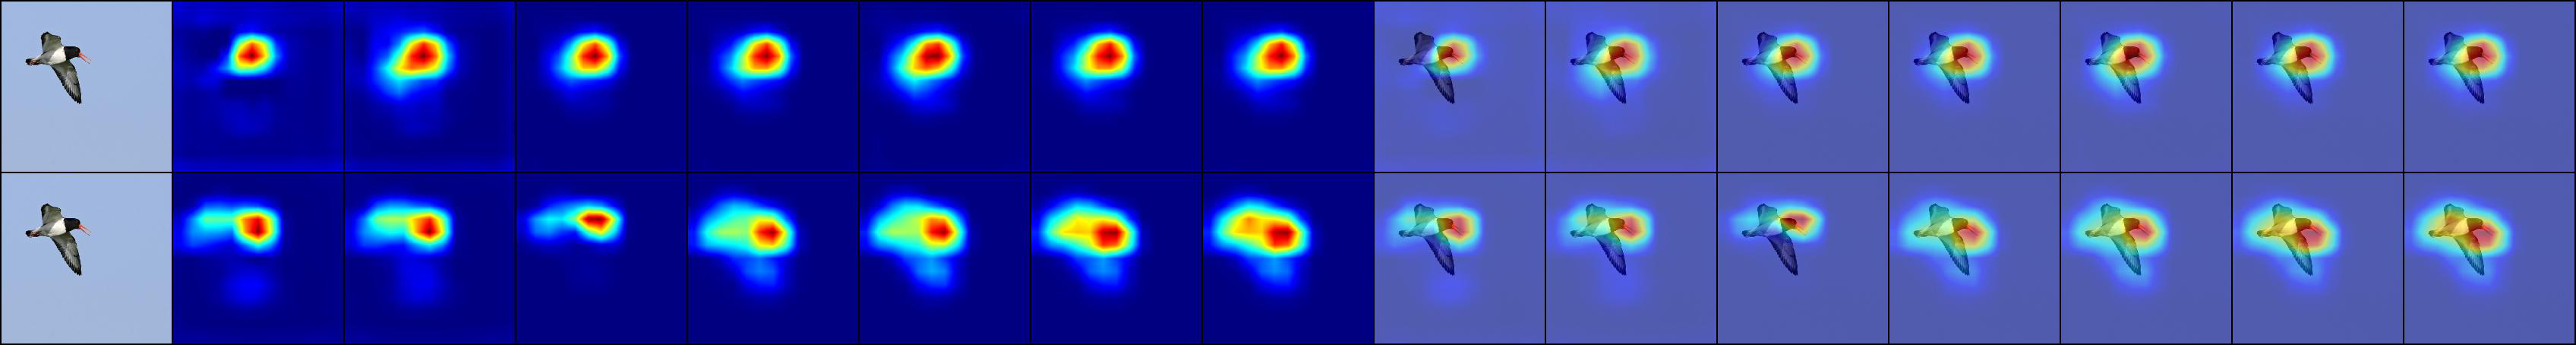

In [25]:
output_dir = 'outputs'
os.makedirs(output_dir, exist_ok=True)
output_name = img_name
output_path = os.path.join(output_dir, output_name)

save_image(images, output_path)
PIL.Image.open(output_path)

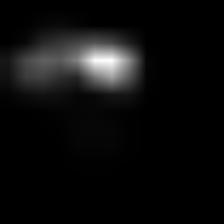

In [26]:
# output_dir = 'sample'
os.makedirs(output_dir, exist_ok=True)
output_name = img_name
output_path = os.path.join(output_dir, output_name)

save_image(mask_score, output_path)
PIL.Image.open(output_path)

In [27]:
output_dir = 'decom'
os.makedirs(output_dir, exist_ok=True)
model_name = ['vgg', 'squeeze']
explain_name = ['ori', 'grad', 'gradp', 'score', 'efcam', 'efmar', 'imcam', 'isgcam']
for i, m in enumerate(model_name):
    for j, e in enumerate(explain_name):
        output_name = m + '_' + e + '_' + img_name
        output_path = os.path.join(output_dir, output_name)
        save_image(img[i][j], output_path)

In [35]:
pixel_num = 50175 # 224 * 224
drop_stride = 1
choose_model = vgg
choose_cam = vgg_isgcam

output_dir = 'inser'
os.makedirs(output_dir, exist_ok=True)

output_name = 'ori' + img_name
output_path = os.path.join(output_dir, output_name)
save_image(torch_img, output_path)

with torch.no_grad():
    choose_model.zero_grad()
    model_output = choose_model(normed_torch_img)
    model_output = F.softmax(model_output, dim=-1)

one_hot = torch.zeros(model_output.shape, dtype=torch.float).to(model_output.device)
model_class = model_output.argmax(dim=1, keepdim=True)
one_hot = one_hot.scatter_(1, model_class, 1)
score = torch.sum(one_hot * model_output, dim=1)

mask, _ = choose_cam(torch_img)
b, k, u, v = mask.shape # k = 1 for saliency map
mask = F.relu(mask).cpu()
# 对saliency_map 排序
# _, indices = torch.sort(mask.view(b, -1), dim=-1, descending=True)
# mask = mask.view(b, -1).cpu().numpy()
# indices = np.argsort(-mask, axis=-1, kind='mergesort')
# indices = torch.from_numpy(indices).to(score.device)
# indices = indices.true_divide(50175)

# indices = indices.view(b, k, u, v)
# print(indices.shape)
# heatmap_ind, result_ind = visualize_cam(indices, torch_img)
# output_name = 'ind' + img_name
# output_path = os.path.join(output_dir, output_name)
# save_image(heatmap_ind, output_path)

# indices = indices.repeat(1, 3, 1, 1)
# print(indices.shape)

# 分位数从100到10，不包括0
drop_num = 100 // drop_stride
threshold = [np.percentile(mask, i*drop_stride) for i in range(drop_num, 0, -1)]
mask = mask.to(torch_img.device).repeat(1, 3, 1, 1)
print('threshold', threshold)
insersion_list = []
for drop_radio in range(drop_num): 
    # drop_data = normed_torch_img.clone().detach()
    # drop_data[indices > pixel_num * drop_radio] = 0 # >计算的是insertion，<计算的是deletion
    # throd = np.percentile(mask.cpu(), 100 - int(drop_radio * 100))
    # print(throd)
    # drop_data = torch.where(indices > pixel_num * drop_radio, 
    #                         torch.zeros_like(torch_img).to(torch_img.device), 
    #                         torch_img)
    drop_data = torch.where(mask > threshold[drop_radio], torch_img,
                        torch.zeros_like(torch_img).to(torch_img.device))

    # output_name = str(drop_radio) + img_name
    # output_path = os.path.join(output_dir, output_name)
    # save_image(drop_data, output_path)

    drop_data = normalizer(drop_data)

    choose_model.zero_grad()
    with torch.no_grad():
        drop_logit = choose_model(drop_data)
        drop_pro = F.softmax(drop_logit, dim=-1)
    drop_score = torch.sum(one_hot * drop_pro, dim=1)
    insersion_list.append(drop_score.cpu())
# insersion_list.append(score.cpu())
insersion_list = np.array(insersion_list)
print('insersion_list', insersion_list)
insersion_auc = insersion_list.sum() * drop_stride / 100
print('insersion_auc', insersion_auc)
#insersion_auc = insersion_auc.detach()#.cpu().numpy()

output_dir = 'dele'
os.makedirs(output_dir, exist_ok=True)

deletion_list = []
for drop_radio in range(drop_num):
    # drop_data = normed_torch_img.clone().detach()
    # drop_data[indices < pixel_num * drop_radio] = 0 # >计算的是insertion，<计算的是deletion
    drop_data = torch.where(mask > threshold[drop_radio], 
                        torch.zeros_like(torch_img).to(torch_img.device),
                        torch_img)

    # output_name = str(drop_radio) + img_name
    # output_path = os.path.join(output_dir, output_name)
    # save_image(drop_data, output_path)

    drop_data = normalizer(drop_data)
    
    choose_model.zero_grad()
    with torch.no_grad():
        drop_logit = choose_model(drop_data)
        drop_pro = F.softmax(drop_logit, dim=-1)
    drop_score = torch.sum(one_hot * drop_pro, dim=1)
    deletion_list.append(drop_score.cpu())
# deletion_list.append(score.cpu())
deletion_list = np.array(deletion_list)
print('deletion_list', deletion_list)
deletion_auc = deletion_list.sum() * drop_stride / 100
print('deletion_auc', deletion_auc)

threshold [0.9875293374061584, 0.7765337377786636, 0.6675178706645966, 0.559217244386673, 0.46345219016075134, 0.38148439675569534, 0.31551553308963776, 0.2601632848381996, 0.21493394672870636, 0.1806342788040638, 0.15297090262174606, 0.12960632145404816, 0.10948336124420166, 0.09327143803238869, 0.080298513174057, 0.06949401088058949, 0.0596524141728878, 0.05130123905837536, 0.043897323310375214, 0.037368700839579105, 0.03177984058856964, 0.026819335762411356, 0.022603916004300117, 0.018927091732621193, 0.015755191445350647, 0.013221582630649209, 0.011884685605764389, 0.010969206225126982, 0.010002491064369678, 0.008955646771937609, 0.007994016166776419, 0.007263297215104103, 0.0066265324130654335, 0.006023635156452656, 0.005543182836845517, 0.005173513665795326, 0.004842539317905903, 0.004514046013355255, 0.004136487143114209, 0.0037767268950119615, 0.003423915011808276, 0.003169284202158451, 0.0029809685656800853, 0.002936986740678549, 0.0028149411082267766, 0.0025702732382342245, 0